In [ ]:
#imports

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [ ]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [ ]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html5")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 34
Error on page 34


In [ ]:
#check the length of total reviews extracted
len(reviews)

3500

In [ ]:
len(country)

3500

In [ ]:
#check the length
stars = stars[:3500]

In [ ]:
df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [ ]:
df

,reviews,stars,date,country
0,✅ Trip Verified | Starting off at Heathrow Te...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,28th March 2024,United Kingdom
1,Not Verified | We have flown this route with ...,8,28th March 2024,United Kingdom
2,✅ Trip Verified | A last minute business trip ...,1,26th March 2024,United Kingdom
3,✅ Trip Verified | Overall I would say disapp...,8,26th March 2024,United Kingdom
4,Not Verified | LHR to Delhi in Business. Exce...,5,25th March 2024,United Kingdom
...,...,...,...,...
3495,Flew between LHR and JFK and the return leg wa...,2,18th September 2014,Malaysia
3496,Flew Heathrow - Madrid return. Have always bee...,1,18th September 2014,United Kingdom
3497,Flew LHR-BUD 11 Sep BA866 and return 15 Sep BA...,1,18th September 2014,United Kingdom
3498,Used BA for a return trip to Denver and was ve...,7,18th September 2014,United Kingdom


In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | We were traveling as a fami...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,13th June 2023,United States
1,✅ Trip Verified | Flight at 8.40am from DUB to...,3,12th June 2023,Australia
2,✅ Trip Verified | Terrible. I have traveled t...,1,11th June 2023,United Kingdom
3,✅ Trip Verified | The customer service is ugl...,1,11th June 2023,United States
4,✅ Trip Verified | Most uncomfortable flight I...,1,10th June 2023,United Kingdom


In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
df.to_csv(file_path, index=False)

'C:/Users/asus/Downloads/test1/BA_reviews.csv'

In [ ]:
df = pd.DataFrame(df)

In [ ]:
# Définissez le nom et l'emplacement du fichier CSV
fichier_csv = "sc_data.csv"

In [ ]:
df.to_csv(fichier_csv, index=False)

In [ ]:
from google.colab import files

In [ ]:
# Accéder au fichier CSV dans Google Drive
files.view(fichier_csv)

<IPython.core.display.Javascript object>

In [ ]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We were traveling as a fami...
1,✅ Trip Verified | Flight at 8.40am from DUB to...
2,✅ Trip Verified | Terrible. I have traveled t...
3,✅ Trip Verified | The customer service is ugl...
4,✅ Trip Verified | Most uncomfortable flight I...


In [ ]:
df.to_csv("/BA_reviews.csv")

In [ ]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re

In [ ]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | We were traveling as a fami...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,13th June 2023,United States
1,✅ Trip Verified | Flight at 8.40am from DUB to...,3,12th June 2023,Australia
2,✅ Trip Verified | Terrible. I have traveled t...,1,11th June 2023,United Kingdom
3,✅ Trip Verified | The customer service is ugl...,1,11th June 2023,United States
4,✅ Trip Verified | Most uncomfortable flight I...,1,10th June 2023,United Kingdom


In [ ]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [ ]:
df['verified']

0        True
1        True
2        True
3        True
4        True
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

In [ ]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [ ]:
# add the corpus to the original dataframe

df['corpus'] = corpus

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | We were traveling as a fami...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,13th June 2023,United States,True,traveling family people accident airport arriv...
1,✅ Trip Verified | Flight at 8.40am from DUB to...,3,12th June 2023,Australia,True,flight dub lcy cancelled pm night text message...
2,✅ Trip Verified | Terrible. I have traveled t...,1,11th June 2023,United Kingdom,True,ble traveled twice year via business class sig...
3,✅ Trip Verified | The customer service is ugl...,1,11th June 2023,United States,True,customer service ugly tried calling two week a...
4,✅ Trip Verified | Most uncomfortable flight I...,1,10th June 2023,United Kingdom,True,uncomfortable flight ever experienced long tim...


In [ ]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [ ]:
# convert the date to datetime format

df.date = pd.to_datetime(df.date)

In [ ]:
df.date.head()

0   2023-06-13
1   2023-06-12
2   2023-06-11
3   2023-06-11
4   2023-06-10
Name: date, dtype: datetime64[ns]

In [ ]:
#check for unique values
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '3', '1', '4', '2', '9', '10',
       '5', '7', '8', '6', 'None'], dtype=object)

In [ ]:
# remove the \t and \n from the ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
df.stars.value_counts()

1       789
2       399
3       391
8       348
10      304
9       297
7       297
5       256
4       238
6       177
None      4
Name: stars, dtype: int64

In [ ]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [ ]:
#check the unique values again
df.stars.unique()


array(['5', '3', '1', '4', '2', '9', '10', '7', '8', '6'], dtype=object)

In [ ]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3494
                       True     False     False        2
dtype: int64

In [ ]:
df.country.isnull().value_counts()

False    3494
True        2
Name: country, dtype: int64

In [ ]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df.shape

(3494, 6)

In [ ]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | We were traveling as a fami...,5,2023-06-13,United States,True,traveling family people accident airport arriv...
1,✅ Trip Verified | Flight at 8.40am from DUB to...,3,2023-06-12,Australia,True,flight dub lcy cancelled pm night text message...
2,✅ Trip Verified | Terrible. I have traveled t...,1,2023-06-11,United Kingdom,True,ble traveled twice year via business class sig...
3,✅ Trip Verified | The customer service is ugl...,1,2023-06-11,United States,True,customer service ugly tried calling two week a...
4,✅ Trip Verified | Most uncomfortable flight I...,1,2023-06-10,United Kingdom,True,uncomfortable flight ever experienced long tim...
...,...,...,...,...,...,...
3489,Flew YVR to MUC via LHR. I had high expectatio...,10,2014-06-02,Canada,False,flew yvr muc via lhr high expectation airline ...
3490,BA 214 in the late spring os a 747-400. Lie-fl...,7,2014-06-01,United States,False,ba late spring o lie flat seat ok still diffic...
3491,MCT-LHR-MAN and LHR-MCT I think you need to fl...,9,2014-06-01,Oman,False,mct lhr man lhr mct think need fly ba every of...
3492,Boeing 777. One of our best flights from Europ...,2,2014-06-01,United States,False,boeing one best flight europe everything done ...


In [ ]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

In [ ]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [ ]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/cleaned-BA-reviews.csv'

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | We were traveling as a fami...,5,2023-06-13,United States,True,traveling family people accident airport arriv...
1,✅ Trip Verified | Flight at 8.40am from DUB to...,3,2023-06-12,Australia,True,flight dub lcy cancelled pm night text message...
2,✅ Trip Verified | Terrible. I have traveled t...,1,2023-06-11,United Kingdom,True,ble traveled twice year via business class sig...
3,✅ Trip Verified | The customer service is ugl...,1,2023-06-11,United States,True,customer service ugly tried calling two week a...
4,✅ Trip Verified | Most uncomfortable flight I...,1,2023-06-10,United Kingdom,True,uncomfortable flight ever experienced long tim...


In [ ]:
df.stars.mean()

4.755867200915856

Text(0.5, 0.98, 'Counts for each ratings')

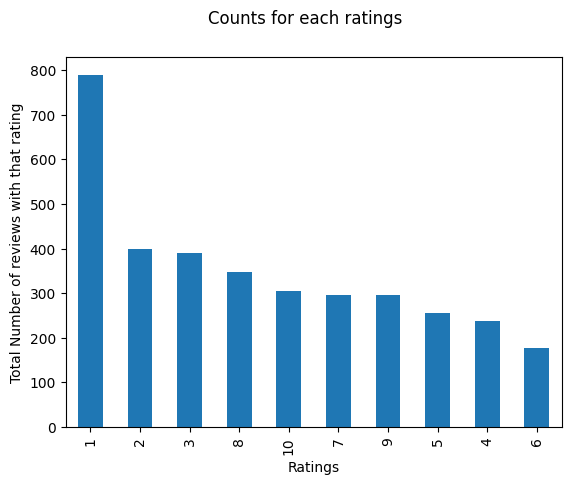

In [ ]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [ ]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()


In [ ]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [ ]:
df_ratings


,Stars,total_counts,pct_values
0,1,789,22.58
1,2,399,11.42
2,3,391,11.19
3,8,348,9.96
4,10,304,8.70
5,7,297,8.50
6,9,296,8.47
7,5,256,7.33
8,4,237,6.78
9,6,177,5.07


Text(0.5, 1.0, 'Counts for each ratings')

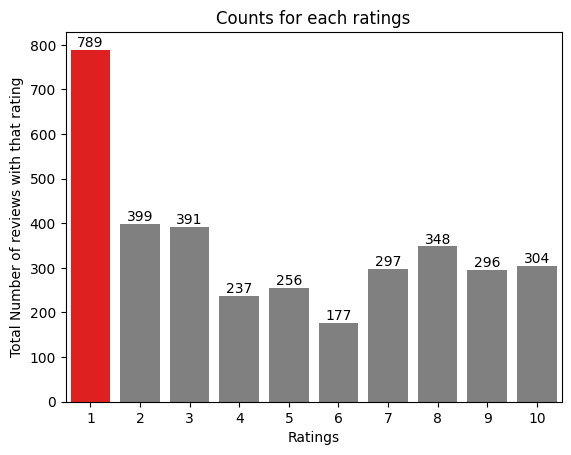

In [ ]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [ ]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

70 unique countries


In [ ]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [ ]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)


Text(0.5, 1.0, 'Maximum number of review by country')

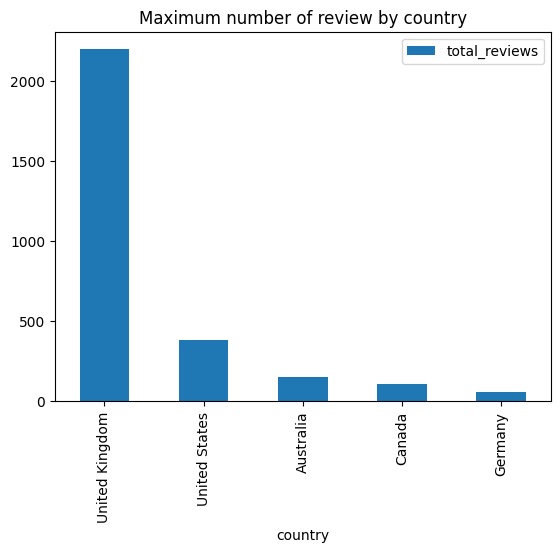

In [ ]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")


In [ ]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

<ipython-input-58-d2bd358aa525>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()


In [ ]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

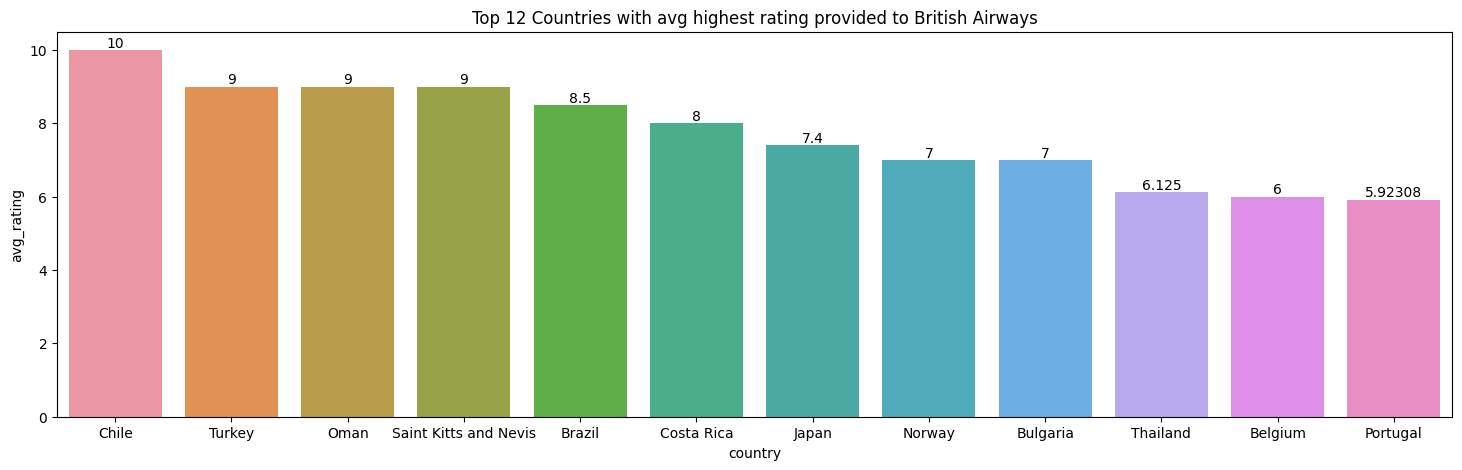

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [ ]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [ ]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

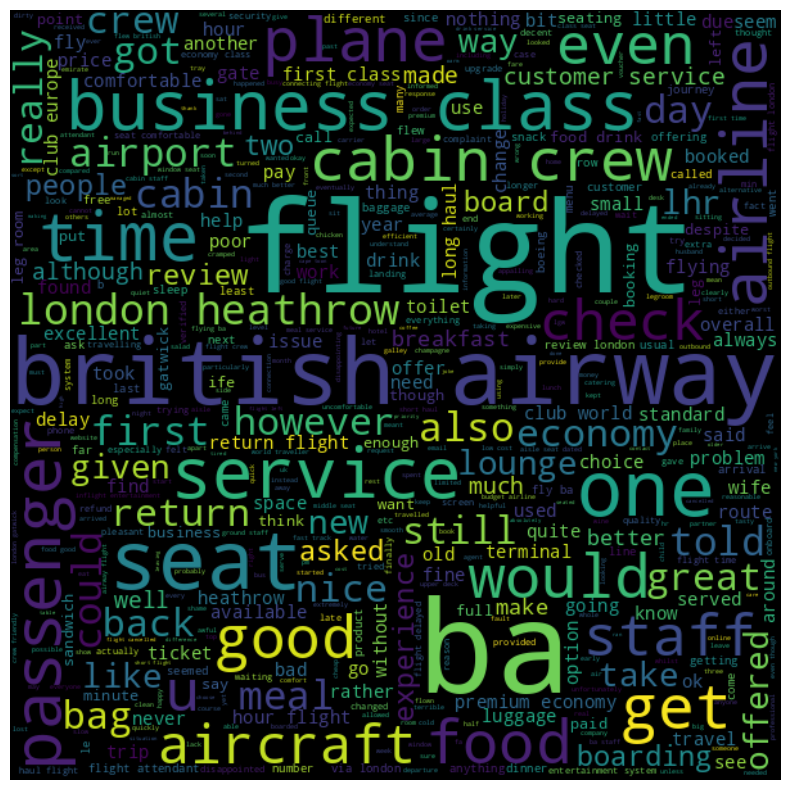

In [ ]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

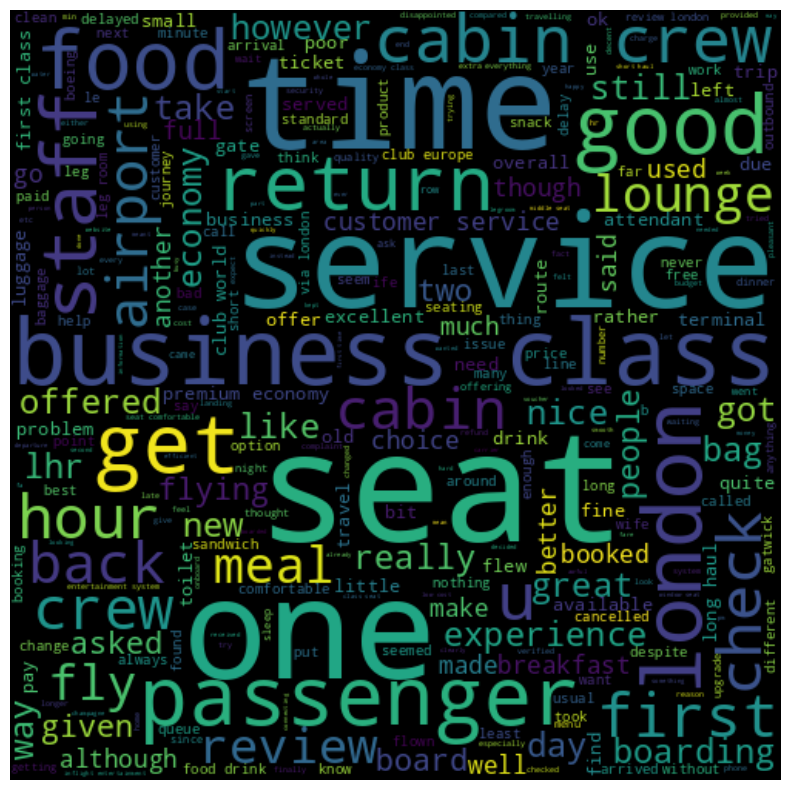

In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

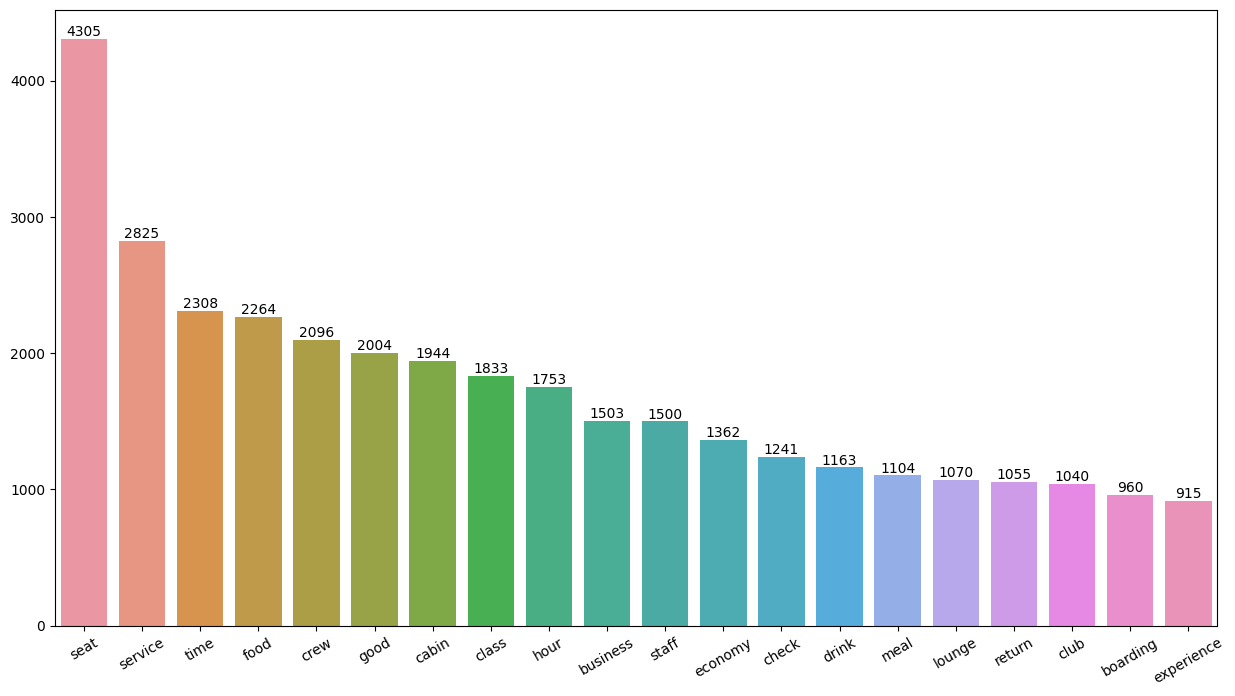

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

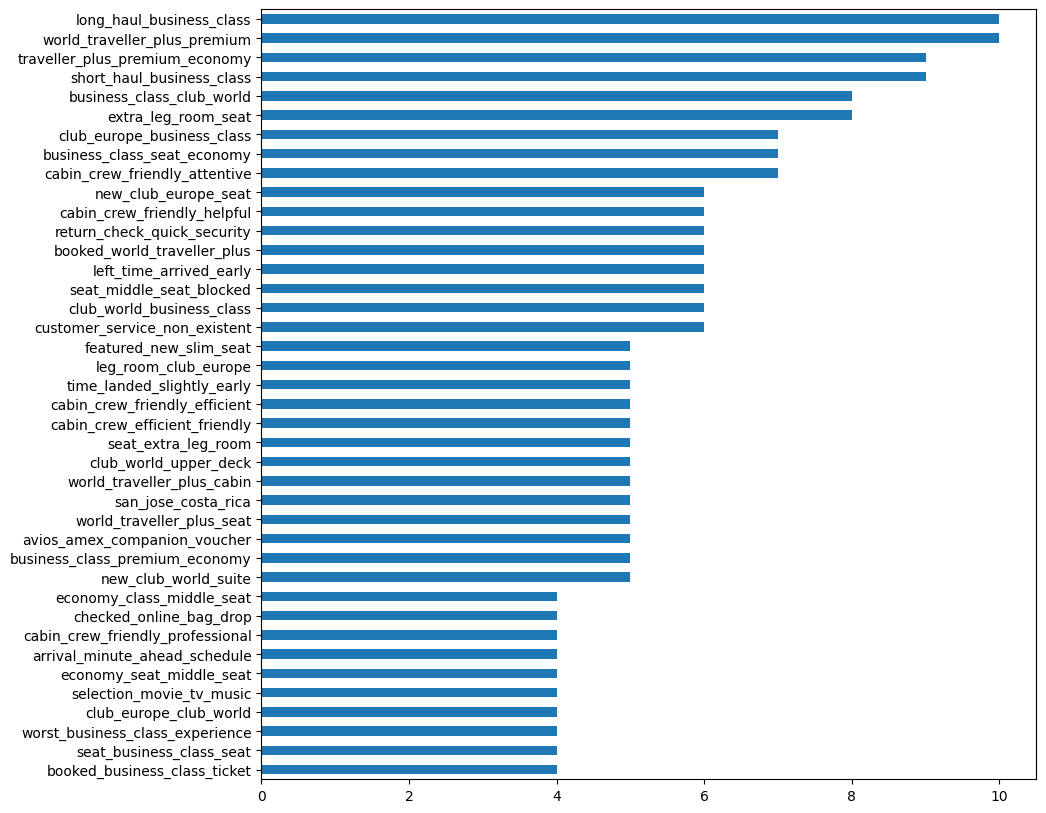

In [ ]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

In [ ]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

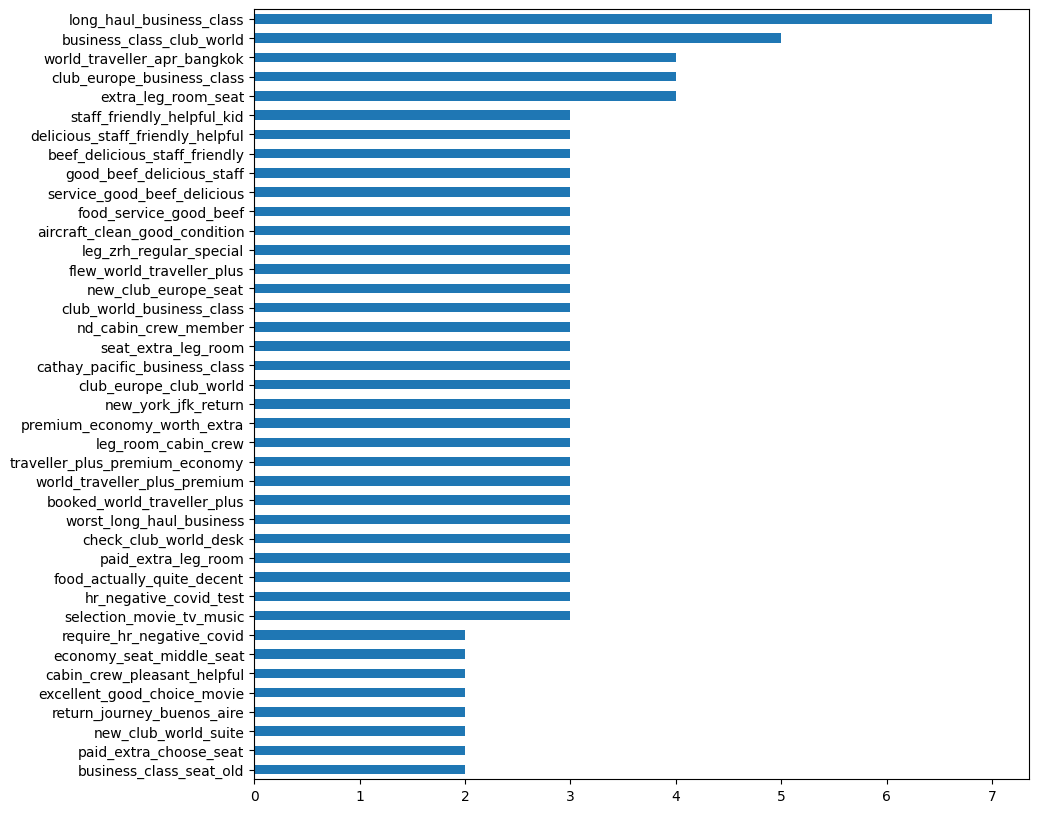

In [ ]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)


<Axes: >

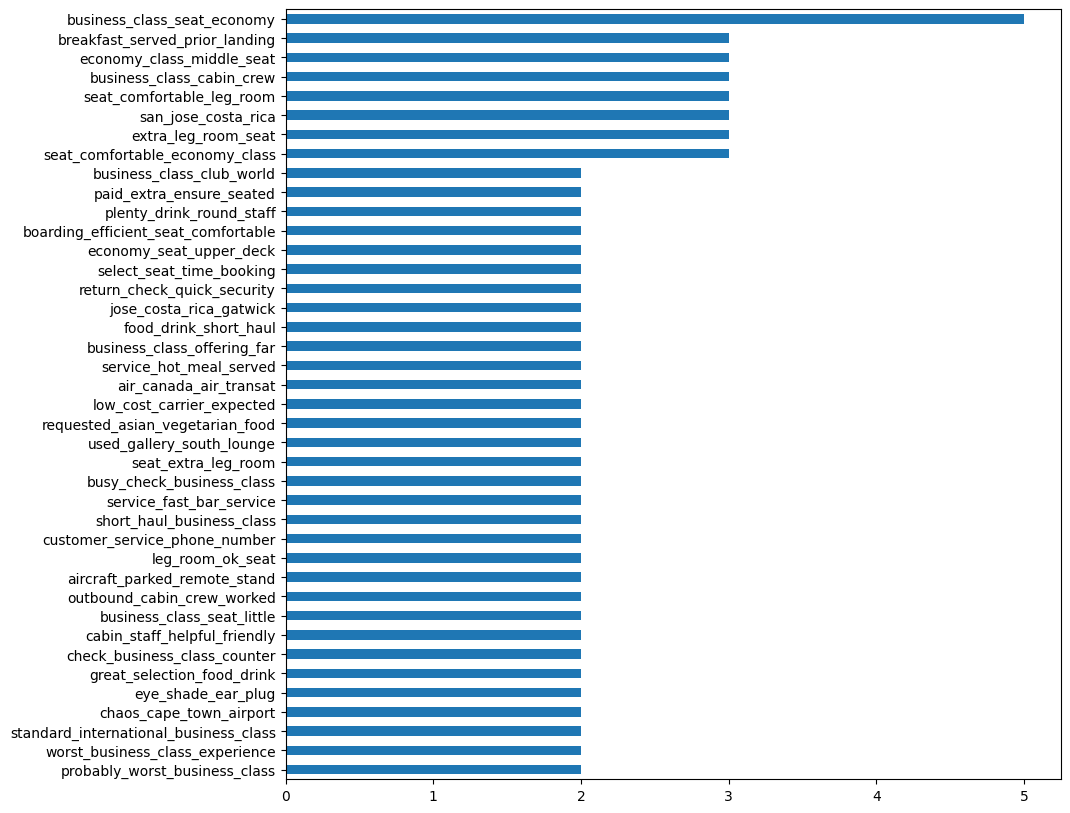

In [ ]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

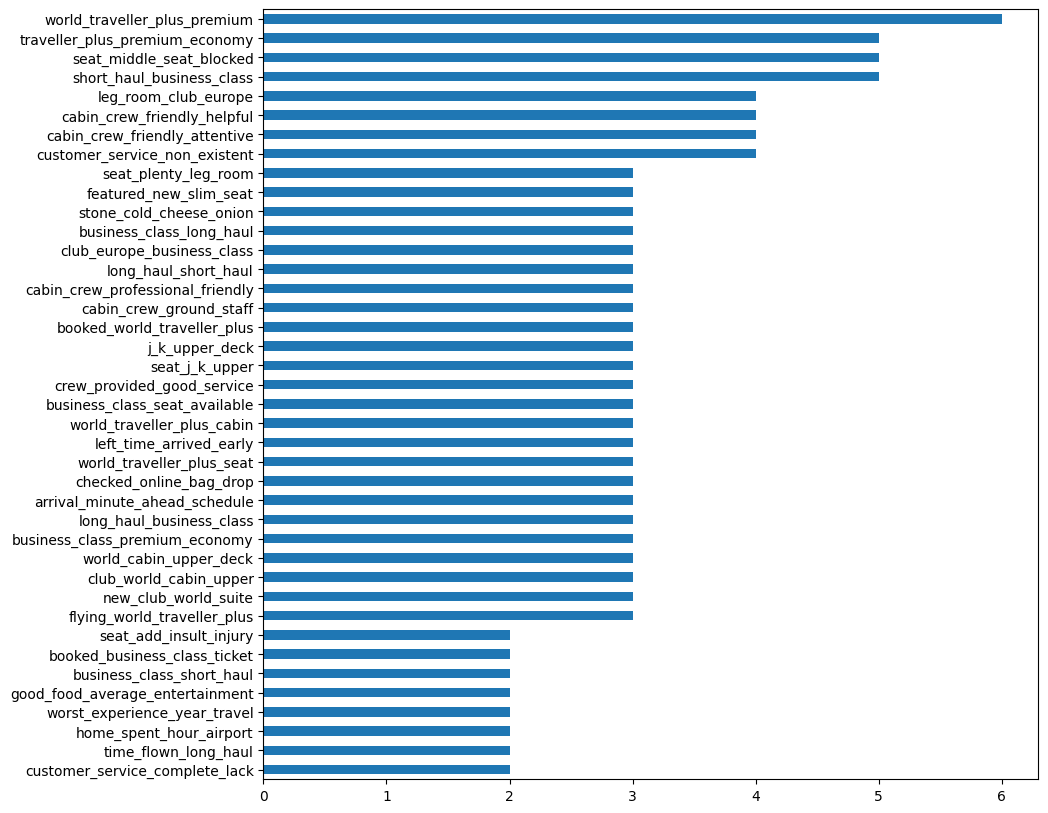

In [ ]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

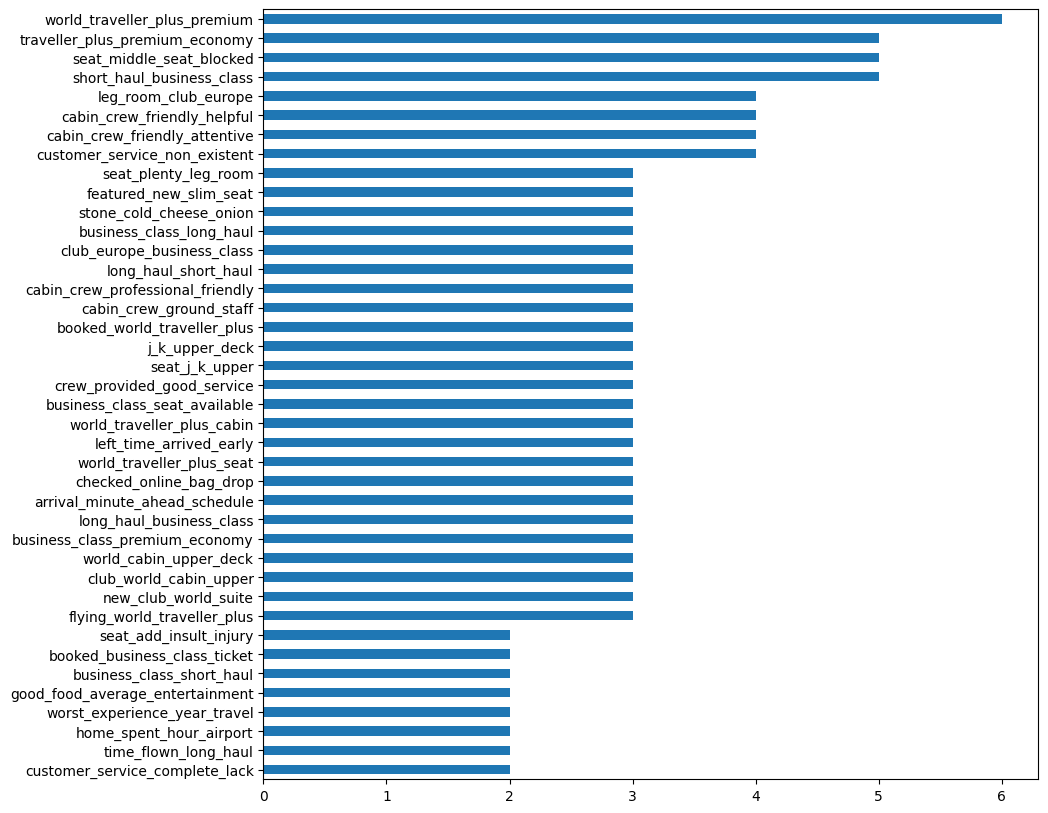

In [ ]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [ ]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [ ]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2353 number of reviews between -0.2 and 0.2 polarity score
1357 number of reviews between -0.1 and 0.1 polarity score


In [ ]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
%%capture
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0

for i in range(len(df.corpus)):

    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [ ]:
df.label.value_counts()

 1    2254
-1    1121
 0     119
Name: label, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,1219.2,flight,791.8,flight,1777.9,seat,1529.1,seat,1466.5,ba,339.8,airway,410.5,flight,1318.0
1,check,480.2,service,479.8,ba,1026.8,ba,1213.3,ba,918.4,crew,223.7,british,404.1,good,1219.4
2,time,381.1,drink,324.6,hour,632.2,class,1139.1,flight,891.9,first,192.1,flight,289.3,crew,847.1
3,ba,330.2,meal,252.7,customer,545.8,flight,1023.6,business,379.3,cabin,173.2,seat,284.5,food,736.2
4,bag,301.8,food,246.1,told,534.4,economy,947.6,class,374.0,passenger,146.2,airline,126.2,service,666.1
5,heathrow,293.1,london,243.4,day,496.3,business,918.2,airline,367.6,staff,141.0,london,107.1,seat,626.0
6,boarding,280.3,crew,196.1,london,453.6,food,763.9,passenger,333.6,food,129.6,ba,105.4,time,615.5
7,london,274.9,served,195.4,would,447.2,service,662.4,get,332.5,flight,117.2,staff,101.9,ba,607.6
8,hour,265.9,cabin,194.2,airway,433.7,cabin,638.6,one,311.9,boarding,110.1,service,88.7,cabin,554.0
9,late,213.9,british,186.7,service,429.0,airway,598.3,crew,281.4,class,100.6,time,83.9,lounge,545.5


In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.        , 0.11106822],
       [0.        , 0.38649494],
       [0.0105903 , 0.08118128],
       ...,
       [0.03817476, 0.18879247],
       [0.0334717 , 0.05301023],
       [0.08914525, 0.07411121]])

In [ ]:
topic_dict = {}

#loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,seat,23.5,flight,20.3
1,ba,12.3,ba,6.9
2,class,10.1,hour,4.5
3,food,8.0,time,3.9
4,business,7.9,london,3.5
5,service,7.7,service,3.4
6,cabin,7.4,airway,3.3
7,good,7.0,british,3.2
8,crew,6.7,would,2.9
9,economy,6.2,airline,2.6
